# Lab 01: Logistic Regression

In this lab we will implement a logistic regression model that performs the functionality of a NAND gate. We will use the sigmoid function as the activation function and the cross-entropy loss function as the loss function. We will use the gradient descent algorithm to optimize the model parameters.

### Data

Our data will have only 4 points, which are the 4 possible combinations of NAND gate inputs. The data is as follows:

| x1  | x2  | y   |
|-----|-----|-----|
| 0   | 0   | 1   |
| 0   | 1   | 1   |
| 1   | 0   | 1   |
| 1   | 1   | 0   |

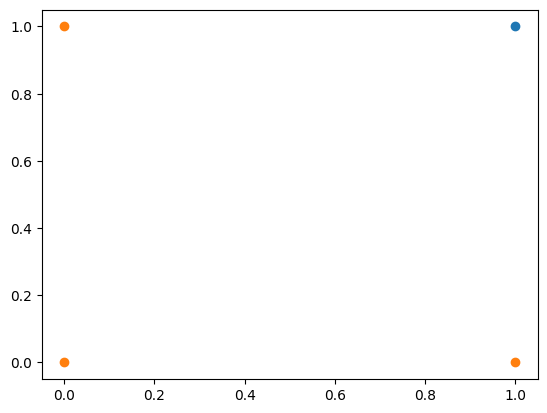

In [5]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Plot the data points
plt.scatter(x=[1],y=[1])
plt.scatter(x=[0,0,1],y=[0,1,0])

### Forward Pass

The forward pass of the logistic regression model is given by:

$$
\hat{y} = \sigma(w_1x_1 + w_2x_2 + b)
$$

where $\sigma$ is the sigmoid function, $w_1$ and $w_2$ are the weights, $x_1$ and $x_2$ are the inputs, and $b$ is the bias.

The sigmoid function is given by:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

We will implement the forward pass as a function that takes the inputs, weights, and bias as arguments and returns the predicted output.

In [6]:
def sigmoid(z):
    y= 1 /( 1 + np.exp(-z))
    return y

def forward_pass(x1, x2, w1, w2, b):
    z = w1*x1 + w2*x2 + b
    return sigmoid(z)
    

### Loss Function

The loss function of the logistic regression model is given by the binary cross-entropy loss function:

$$
L(y, \hat{y}) = -y \log(\hat{y}) - (1 - y) \log(1 - \hat{y})
$$

where $y$ is the true label and $\hat{y}$ is the predicted output.

We will implement the loss function as a function that takes the true label and predicted output as arguments and returns the loss.

In [7]:
def loss(y, y_pred):
    return (-y*math.log(y_pred) - (1-y)*math.log(1-y_pred))

### Gradient Descent

The gradient descent algorithm is used to update the weights and bias of the logistic regression model in order to minimize the loss function. The update rule for the weights and bias is given by:

$$
w_i = w_i - \alpha \frac{\partial L}{\partial w_i}
$$

$$
b = b - \alpha \frac{\partial L}{\partial b}
$$

where $\alpha$ is the learning rate.

The partial derivatives of the loss function with respect to the weights and bias are given by:

$$
\frac{\partial L}{\partial w_1} = x_1(\hat{y} - y)
$$

$$
\frac{\partial L}{\partial w_2} = x_2(\hat{y} - y)
$$

$$
\frac{\partial L}{\partial b} = \hat{y} - y
$$

We will implement the gradient computation and parameter update functions.

In [8]:
def compute_gradients(x, y_true, y_pred):
    dw1 = x[0]*(y_pred - y_true)
    dw2 = x[1]*(y_pred - y_true)
    db = y_pred - y_true
    return dw1, dw2, db

In [9]:
def update_parameters(w1, w2, b, dw1, dw2, db, learning_rate):
    w1 = w1 - dw1*learning_rate
    w2 = w2 - dw2*learning_rate
    b = b - db*learning_rate
    return w1, w2, b

### Create the Model

We will now create the logistic regression model using the gradient descent algorithm. We will initialize the weights and bias, set the learning rate, and train the model for a fixed number of epochs.

The logistic regression class will keep track of losses and accuracies during training. We will implement the training loop and evaluate the model on the training data.

In [10]:
np.random.seed(0)

class LogisticRegression:
    def __init__(self):
        self.w1 = np.random.randn()
        self.w2 = np.random.randn()
        self.b = np.random.randn()
        self.losses = []
        self.accuracies = []

    def train(self, X, y, learning_rate, epochs):
        for epoch in range(epochs):
            epoch_loss = 0
            correct = 0
            for i in range(len(X)):
                x = X[i]
                y_true = y[i]
                y_pred = forward_pass(x[0], x[1], self.w1, self.w2, self.b)
                epoch_loss += loss(y_true, y_pred)
                dw1, dw2, db = compute_gradients(x, y_true, y_pred)
                self.w1, self.w2, self.b = update_parameters(self.w1, self.w2, self.b, dw1, dw2, db, learning_rate)
                if y_pred >= 0.5 and y_true == 1 or y_pred < 0.5 and y_true == 0:
                    correct += 1
            accuracy = correct / len(X)
            self.losses.append(epoch_loss)
            self.accuracies.append(accuracy)
            print(f"Epoch {epoch + 1}: Loss = {epoch_loss}, Accuracy = {accuracy}")

    def predict(self, X):
        predictions = []
        for x in X:
            y_pred = forward_pass(x[0], x[1], self.w1, self.w2, self.b)
            predictions.append(y_pred)
        return predictions

### Train the Model

We will now create an instance of the logistic regression model, train it on the NAND gate data, and evaluate its performance.

In [11]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([1, 1, 1, 0])

model = LogisticRegression()
model.train(X, y, learning_rate=0.1, epochs=1000)

Epoch 1: Loss = 3.858172972751293, Accuracy = 0.75
Epoch 2: Loss = 3.707534420220413, Accuracy = 0.75
Epoch 3: Loss = 3.567496200289091, Accuracy = 0.75
Epoch 4: Loss = 3.437912610272193, Accuracy = 0.75
Epoch 5: Loss = 3.318502675744937, Accuracy = 0.75
Epoch 6: Loss = 3.2088589706927655, Accuracy = 0.75
Epoch 7: Loss = 3.1084626230911394, Accuracy = 0.75
Epoch 8: Loss = 3.0167036577733617, Accuracy = 0.75
Epoch 9: Loss = 2.932905299501425, Accuracy = 0.75
Epoch 10: Loss = 2.85635041095464, Accuracy = 0.75
Epoch 11: Loss = 2.7863079910576376, Accuracy = 0.75
Epoch 12: Loss = 2.722057699282575, Accuracy = 0.75
Epoch 13: Loss = 2.662910716152111, Accuracy = 0.75
Epoch 14: Loss = 2.6082258253868824, Accuracy = 0.75
Epoch 15: Loss = 2.5574202750536488, Accuracy = 0.75
Epoch 16: Loss = 2.5099756006479224, Accuracy = 0.75
Epoch 17: Loss = 2.465439066158602, Accuracy = 0.75
Epoch 18: Loss = 2.4234216528416166, Accuracy = 0.75
Epoch 19: Loss = 2.3835936082059446, Accuracy = 0.75
Epoch 20: Los

### Evaluate the Model

We will now evaluate the model on the training data and plot the loss and accuracy curves.

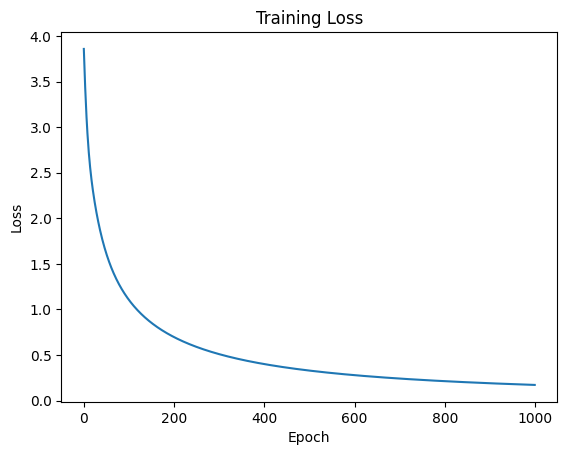

In [12]:
plt.plot(model.losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

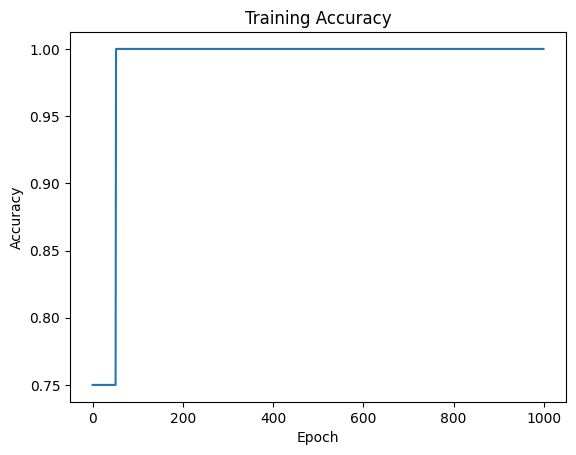

In [13]:
plt.plot(model.accuracies)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.show()

### Predictions

We will now make predictions using the trained model and compare them with the true labels.

In [14]:
predictions = model.predict(X)
for i in range(len(X)):
    print(f"Input: {X[i]}, Predicted Output: {predictions[i]}")

Input: [0 0], Predicted Output: 0.9998049147541425
Input: [0 1], Predicted Output: 0.9508512994972436
Input: [1 0], Predicted Output: 0.9505660828242474
Input: [1 1], Predicted Output: 0.06767588285439007


### Plot the Decision Boundary

We will now plot the decision boundary of the logistic regression model.

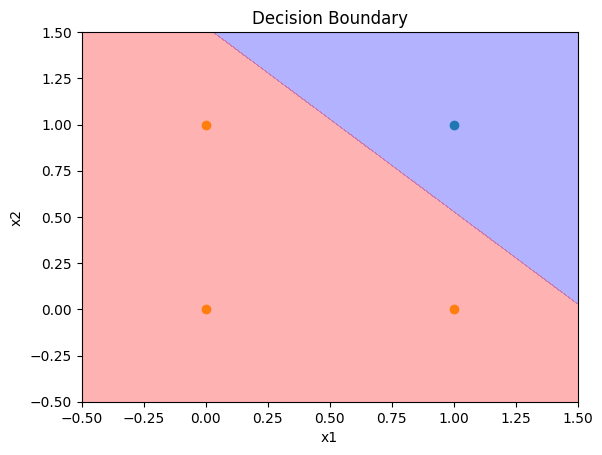

In [15]:
x1 = np.linspace(-0.5, 1.5, 100)
x2 = np.linspace(-0.5, 1.5, 100)
X1, X2 = np.meshgrid(x1, x2)
Z = forward_pass(X1, X2, model.w1, model.w2, model.b)

plt.contourf(X1, X2, Z, levels=1, colors=['blue', 'red'], alpha=0.3)
plt.scatter(x=[1],y=[1])
plt.scatter(x=[0,0,1],y=[0,1,0])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Decision Boundary')
plt.show()

Credits: Pattern Recognition Course TAs